In [1]:
# to load the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Install required packages
!pip install numpy scikit-image tensorboardX colorama tqdm setproctitle scipy==1.1.0

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 31.2MB 29.7MB/s 
  Created wheel for setproctitle: filename=setproctitle-1.1.10-cp36-cp36m-linux_x86_64.whl size=33937 sha256=fb08ae4cd29f652985c1c933be710d5968afbf91dcff315cc87049b5160b9b67
  Stored in directory: /root/.cache/pip/wheels/e6/b1/a6/9719530228e258eba904501fef99d5d85c80d52bd8f14438a3
Successfully built setproctitle
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.2
    Uninstalling scipy-1.3.2:
      Successfully uninstalled scipy-1.3.2


In [3]:
# clone the flownet2 repo for optical flow extraction
!git clone https://github.com/NVIDIA/flownet2-pytorch.git

Cloning into 'flownet2-pytorch'...
remote: Enumerating objects: 518, done.
remote: Total 518 (delta 0), reused 0 (delta 0), pack-reused 518
Receiving objects: 100% (518/518), 6.26 MiB | 4.12 MiB/s, done.
Resolving deltas: 100% (295/295), done.


In [4]:
# To Visualize Optical Flow outputs
pip install flowiz -U

     |████████████████████████████████| 2.5MB 2.7MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
  Created wheel for eel: filename=Eel-0.11.0-cp36-none-any.whl size=9989 sha256=9ee4dbc1195ce3c29daecd7d72941af6a220876d0aa100c5acaef22fd20a95da
  Stored in directory: /root/.cache/pip/wheels/4d/49/12/7a2751c0826365ae4879e212631853079c20ec7671169284fa
  Created wheel for bottle-websocket: filename=bottle_websocket-0.2.9-cp36-none-any.whl size=2349 sha256=0222bd00de5f34373708537ed4fe2f600a470c266a13cd7fda194cdbf12aee2a
  Stored in directory: /root/.cache/pip/wheels/1e/fd/80/af47541f053f14f4e5fd5927c91a7615358826429ba036152d
Successfully built eel bottle-websocket


In [5]:
# install custom layers for flownet2
# before running, add the line:
# '-gencode', 'arch=compute_37,code=sm_37'
# to the setup.py of the the 3 directories in network
# then modify the path in the first line of install.sh
!bash flownet2-pytorch/install.sh

running install
running bdist_egg
running egg_info
creating correlation_cuda.egg-info
writing correlation_cuda.egg-info/PKG-INFO
writing dependency_links to correlation_cuda.egg-info/dependency_links.txt
writing top-level names to correlation_cuda.egg-info/top_level.txt
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
writing manifest file 'correlation_cuda.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
building 'correlation_cuda' extension
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/torch/include -I/usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include -I/usr/local/lib/python3.6/dist-packages/torch/include/TH -I/usr/local/lib/python3.6/dist-packages/torch/include/THC -I/usr/local

In [6]:
# unzip sample videos from drive
!unzip drive/My\ Drive/PFE/001_050_Videos

Archive:  drive/My Drive/PFE/001_050_Videos.zip
   creating: 001/
  inflating: 001/099.jpg             
  inflating: 001/098.jpg             
  inflating: 001/097.jpg             
  inflating: 001/096.jpg             
  inflating: 001/095.jpg             
  inflating: 001/094.jpg             
  inflating: 001/093.jpg             
  inflating: 001/092.jpg             
  inflating: 001/091.jpg             
  inflating: 001/090.jpg             
  inflating: 001/089.jpg             
  inflating: 001/088.jpg             
  inflating: 001/087.jpg             
  inflating: 001/086.jpg             
  inflating: 001/085.jpg             
  inflating: 001/084.jpg             
  inflating: 001/083.jpg             
  inflating: 001/082.jpg             
  inflating: 001/081.jpg             
  inflating: 001/080.jpg             
  inflating: 001/079.jpg             
  inflating: 001/078.jpg             
  inflating: 001/077.jpg             
  inflating: 001/076.jpg             
  inflating: 001/075.j

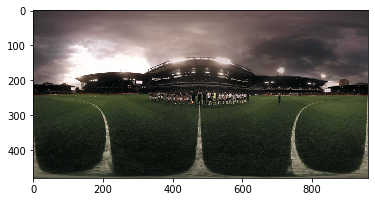

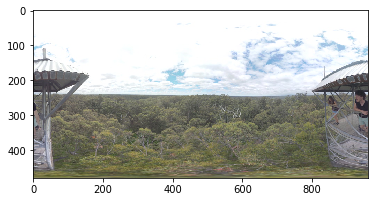

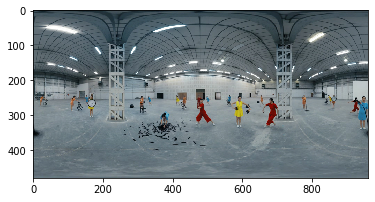

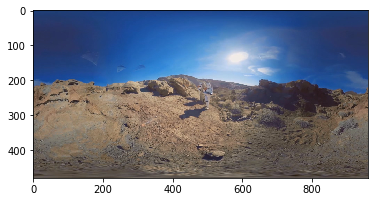

In [16]:
# examples of images from different videos
from matplotlib import pyplot as plt
for i in range(1,5):
  plt.imshow(plt.imread('0'+str(i)+'0/015.jpg'))
  plt.show()

In [0]:
# create the output directory for optical flow files
for i in range(1,5):
  !mkdir 'flow_output$i'

In [0]:
# add the weights of the flownet2 network as checkpoint from gdrive
!mkdir flownet2-pytorch/checkpoints
!cp drive/My\ Drive/FlowNet2_chkp.pth.tar flownet2-pytorch/checkpoints

In [28]:
# Generating Optical Flow for different videos
# I had to modify the original code because it loads only dataset of png not jpg as we have
# to modify: ImagesFromFolder function in dataset.py
for i in range(1,5):
  !python flownet2-pytorch/main.py --inference --model FlowNet2 --save_flow --inference_dataset ImagesFromFolder \
--inference_dataset_root /content/0{i}0 \
--resume /content/flownet2-pytorch/checkpoints/FlowNet2_chkp.pth.tar \
--save /content/flow_output{i}



Parsing Arguments
  [0.049s] batch_size: 8
  [0.050s] crop_size: [256, 256]
  [0.050s] fp16: False
  [0.050s] fp16_scale: 1024.0
  [0.050s] gradient_clip: None
  [0.050s] inference: True
  [0.050s] inference_batch_size: 1
  [0.050s] inference_dataset: ImagesFromFolder
  [0.050s] inference_dataset_iext: jpg
  [0.050s] inference_dataset_replicates: 1
  [0.050s] inference_dataset_root: /content/010
  [0.050s] inference_n_batches: -1
  [0.050s] inference_size: [-1, -1]
  [0.050s] log_frequency: 1
  [0.050s] loss: L1Loss
  [0.050s] model: FlowNet2
  [0.050s] model_batchNorm: False
  [0.050s] model_div_flow: 20.0
  [0.050s] name: run
  [0.050s] no_cuda: False
  [0.050s] number_gpus: 1
  [0.050s] number_workers: 8
  [0.050s] optimizer: Adam
  [0.050s] optimizer_amsgrad: False
  [0.050s] optimizer_betas: (0.9, 0.999)
  [0.050s] optimizer_eps: 1e-08
  [0.050s] optimizer_lr: 0.001
  [0.050s] optimizer_weight_decay: 0
  [0.050s] render_validation: False
  [0.050s] resume: /content/flownet2-pytorc

In [29]:
# here is what we find in the flow_output directory
!ls flow_output1/inference/run.epoch-0-flow-field

000000.flo  000019.flo	000038.flo  000057.flo	000076.flo  000095.flo
000001.flo  000020.flo	000039.flo  000058.flo	000077.flo  000096.flo
000002.flo  000021.flo	000040.flo  000059.flo	000078.flo  000097.flo
000003.flo  000022.flo	000041.flo  000060.flo	000079.flo  000098.flo
000004.flo  000023.flo	000042.flo  000061.flo	000080.flo  000099.flo
000005.flo  000024.flo	000043.flo  000062.flo	000081.flo  000100.flo
000006.flo  000025.flo	000044.flo  000063.flo	000082.flo  000101.flo
000007.flo  000026.flo	000045.flo  000064.flo	000083.flo  000102.flo
000008.flo  000027.flo	000046.flo  000065.flo	000084.flo  000103.flo
000009.flo  000028.flo	000047.flo  000066.flo	000085.flo  000104.flo
000010.flo  000029.flo	000048.flo  000067.flo	000086.flo  000105.flo
000011.flo  000030.flo	000049.flo  000068.flo	000087.flo  000106.flo
000012.flo  000031.flo	000050.flo  000069.flo	000088.flo  000107.flo
000013.flo  000032.flo	000051.flo  000070.flo	000089.flo  000108.flo
000014.flo  000033.flo	000052.flo 

It contains a displacement vector consisting of 2 values; the component of each vector.In the example below Focusing on the pixel at location 0, 0 we can see the displacement vector at that point seems to be pointing to the left and to the bottom i.e. the bottom left quadrant of an x, y plot, which means we expect the color code for this location to be a light blue or even a green color based on the color coding scheme given below:

![alt text](https://blog.dancelogue.com/content/images/2019/07/FlowVisualization-1.jpg)

In [0]:
# create directories to store the visualization of the optical flows and the corresponing videos
for i in range(1,5):
  !mkdir flow_output{i}/flowiz/

In [31]:
# Generating Color Code Scheme and the corresponding videos
for i in range(1, 5):
  !python -m flowiz \
flow_output{i}/inference/run.epoch-0-flow-field/*.flo \
-o flow_output{i}/flowiz/color_coding \
-v flow_output{i}/flowiz/color_coding/video \
-r 5

> Rendering images [.png] from the flows [.flo]
> Created directory: flow_output1/flowiz/color_coding
flow_output1/flowiz/color_coding/000113.flo.png: 100% 114/114 [00:17<00:00,  7.35it/s]
> Compiling [.mp4] video from the flow images [.png]
> Saving video as: flow_output1/flowiz/color_coding/video/000000.flo.mp4
> Rendering images [.png] from the flows [.flo]
> Created directory: flow_output2/flowiz/color_coding
flow_output2/flowiz/color_coding/000163.flo.png: 100% 164/164 [00:31<00:00,  6.12it/s]
> Compiling [.mp4] video from the flow images [.png]
> Saving video as: flow_output2/flowiz/color_coding/video/000000.flo.mp4
> Rendering images [.png] from the flows [.flo]
> Created directory: flow_output3/flowiz/color_coding
flow_output3/flowiz/color_coding/000153.flo.png: 100% 154/154 [00:21<00:00,  6.74it/s]
> Compiling [.mp4] video from the flow images [.png]
> Saving video as: flow_output3/flowiz/color_coding/video/000000.flo.mp4
> Rendering images [.png] from the flows [.flo]
> Creat

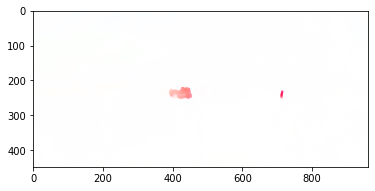

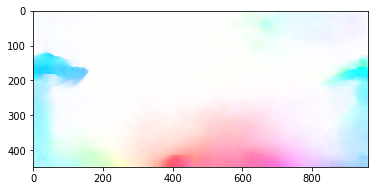

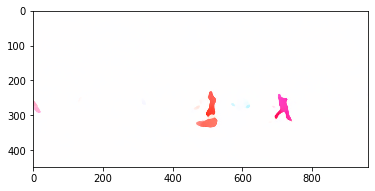

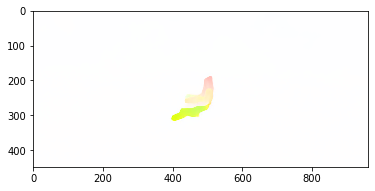

In [34]:
# visualize the optical flow of the same examples shown before
for i in range(1,5):
  plt.imshow(plt.imread('flow_output'+str(i)+'/flowiz/color_coding/000016.flo.png'))
  plt.show()